In [1]:
import wrapper
import tensorflow as tf
from tensorflow.core.example import example_pb2
from cStringIO import StringIO
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline
import numpy as np

a = wrapper.Wrapper("discrete_tcnn1", 
            "/data/yang/code/BDD_Driving_Model/data/discrete_tcnn1/model.ckpt-126001.bestmodel",
            20)

using Yang's load pretrained weights version
('conv1', 'weights', (11, 11, 3, 96))
('weight = ', 0.0)
('conv1', 'biases', (96,))
(20, 55, 55, 96)
('conv2', 'weights', (5, 5, 48, 256))
('weight = ', 0.0)
('conv2', 'biases', (256,))
(20, 27, 27, 256)
('conv3', 'weights', (3, 3, 256, 384))
('weight = ', 0.0)
('conv3', 'biases', (384,))
(20, 13, 13, 384)
('conv4', 'weights', (3, 3, 192, 384))
('weight = ', 0.0)
('conv4', 'biases', (384,))
(20, 13, 13, 384)
('conv5', 'weights', (3, 3, 192, 256))
('weight = ', 0.0)
('conv5', 'biases', (256,))
(20, 13, 13, 256)
('fc6', 'weights', (9216, 4096))
('weight = ', 0.0)
('fc6', 'biases', (4096,))
(20, 1, 1, 4096)
('fc7', 'weights', (4096, 4096))
('weight = ', 0.0)
('fc7', 'biases', (4096,))
(20, 1, 1, 4096)
('fc8', 'weights', (4096, 1000))
('weight = ', 0.0)
('fc8', 'biases', (1000,))
(20, 1, 1, 1000)
---------------------------------------- TrainStage1_discrete_tcnn1
----------------------------------------
All tensors that will be summarized:
Tenso

In [2]:
example = example_pb2.Example()
in_file = "/data/yang_cache/tfrecord_release/tfrecords/validation/ca737ec3-53cd36e2.tfrecords"

count = 0
for example_serialized in tf.python_io.tf_record_iterator(in_file):
    example.ParseFromString(example_serialized)
    feature_map = example.features.feature
    encoded = feature_map['image/encoded'].bytes_list.value
    print count
    count += 1

0


In [ ]:
file_jpgdata = StringIO(encoded[0])
dt = Image.open(file_jpgdata)
imshow(np.asarray(dt))
print a.observe_a_frame(np.asarray(dt))

In [ ]:
for i in range(len(encoded)):
    if i % 5 == 0:
        file_jpgdata = StringIO(encoded[0])
        dt = Image.open(file_jpgdata)
        arr = np.asarray(dt)
        out = a.observe_a_frame(arr)
        print out
        print i/5

In [18]:
import pandas as pd
import math
import numpy as np

In [3]:
import os
cwd = os.getcwd()

In [4]:
cwd

'/work/BDD_Driving_Model-1'

In [5]:
fd = '/work/data/DREYEVE_DATA/01'

In [12]:
df = pd.read_csv(os.path.join(fd, 'speed_course_coord.txt'),
                 sep='\t', names=['time_point', 'speed', 'course', 'x', 'y', 'unknown'])

In [27]:
df.speed = df.speed/3.6

In [28]:
speeds = np.zeros((df.shape[0], 2))

In [29]:
speeds[:, 0] = np.sin(df.course/360*math.pi)*df.speed
speeds[:, 1] = np.cos(df.course/360*math.pi)*df.speed

In [30]:
speeds

array([[  0.98721326,  -9.39270679],
       [  1.1005868 ,  -9.65972637],
       [  1.1005868 ,  -9.65972637],
       ...,
       [  3.78769324, -17.08518012],
       [  3.78769324, -17.08518012],
       [  3.84781536, -17.35637346]])

In [33]:
np.arange(3)

array([0, 1, 2])

In [37]:
target_fps = 10

In [34]:
ORIGINAL_FPS = 25
xs = np.arange(speeds.shape[0])/ORIGINAL_FPS

In [35]:
xs

array([0.0000e+00, 4.0000e-02, 8.0000e-02, ..., 2.9988e+02, 2.9992e+02,
       2.9996e+02])

In [39]:
ts = np.arange(0, speeds.shape[0]/ORIGINAL_FPS, 1/target_fps)

In [41]:
output_speeds = np.zeros((len(ts), 2))

In [51]:
output_speeds[:, 0] = np.interp(ts, xs, speeds[:, 0])
output_speeds[:, 1] = np.interp(ts, xs, speeds[:, 1])

In [45]:
import matplotlib.pyplot as plt

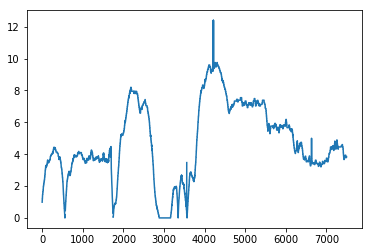

In [47]:
plt.plot(speeds[:, 0])

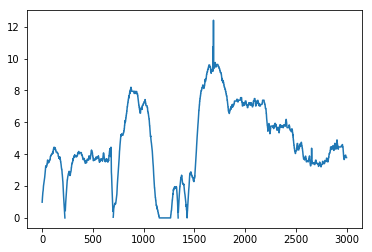

In [52]:
plt.plot(output_speeds[:,0])

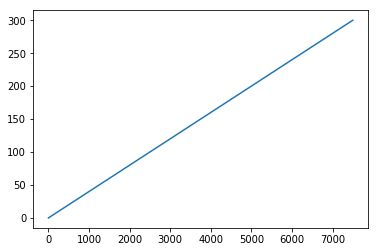

In [50]:
plt.plot(xs)